In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv('data_balita.csv')
df.head()
df.shape
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120994,60,perempuan,100.600000,normal
120995,60,perempuan,98.300000,stunted
120996,60,perempuan,121.300000,normal
120997,60,perempuan,112.200000,normal


In [74]:
#cek jumlah balita laki-laki dan perempuan
df['Jenis Kelamin'].value_counts()

Jenis Kelamin
perempuan    61002
laki-laki    59997
Name: count, dtype: int64

In [76]:
#cek jumlah status gizi
df['Status Gizi'].value_counts()

Status Gizi
normal              67755
severely stunted    19869
tinggi              19560
stunted             13815
Name: count, dtype: int64

In [106]:
#menghapus nilai duplikat
df_no_duplicate = df.drop_duplicates()
print(df_no_duplicate)

        Umur (bulan) Jenis Kelamin  Tinggi Badan (cm)       Status Gizi  \
0                  0     laki-laki          44.591973           stunted   
1                  0     laki-laki          56.705203            tinggi   
2                  0     laki-laki          46.863358            normal   
3                  0     laki-laki          47.508026            normal   
4                  0     laki-laki          42.743494  severely stunted   
...              ...           ...                ...               ...   
120959            60     perempuan         100.700000            normal   
120967            60     perempuan         113.700000            normal   
120968            60     perempuan         107.500000            normal   
120972            60     perempuan         127.600000            tinggi   
120993            60     perempuan         116.100000            normal   

        Status Gizi num  
0                     2  
1                     4  
2                    

In [82]:
#identifikasi nilai missing
missing_values = df.isna().sum()
print(missing_values)

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64


**STATISTIKA DASAR**

In [86]:
#menampilkan data ststistik dalam sataframe dengan menggunakna method describe()
df_stats = df.describe()
print(df_stats)

        Umur (bulan)  Tinggi Badan (cm)
count  120999.000000      120999.000000
mean       30.173803          88.655434
std        17.575119          17.300997
min         0.000000          40.010437
25%        15.000000          77.000000
50%        30.000000          89.800000
75%        45.000000         101.200000
max        60.000000         128.000000


**Distribusi**

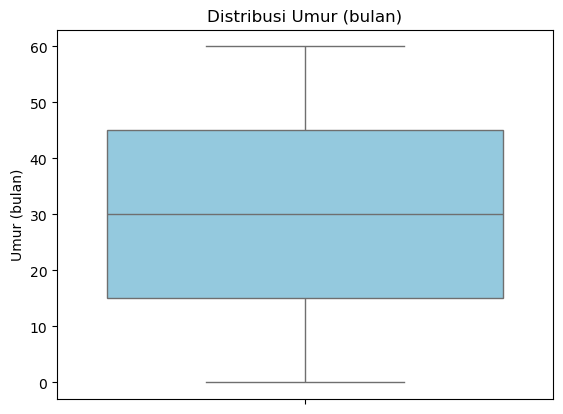

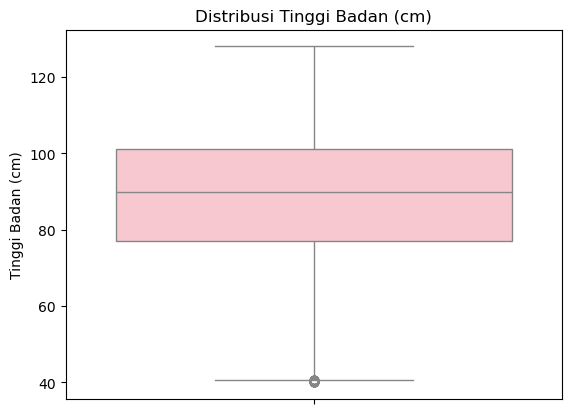

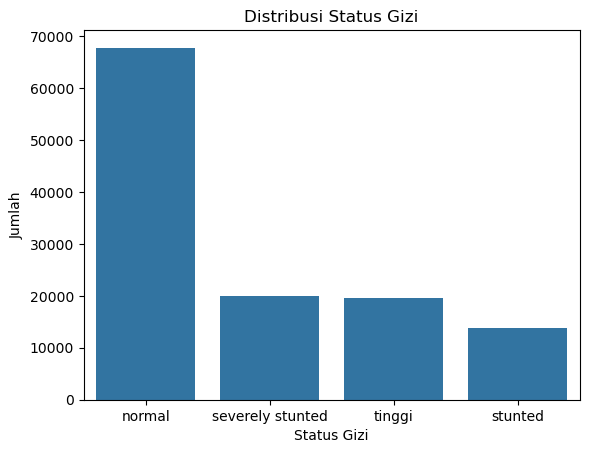

In [97]:
#USIA
sns.boxplot(y = df['Umur (bulan)'], color = 'skyblue')
plt.title('Distribusi Umur (bulan)')
plt.show()

#TINNGI BADAN
sns.boxplot(y = df['Tinggi Badan (cm)'], color = 'pink')
plt.title('Distribusi Tinggi Badan (cm)')
plt.show()

#STATUS GIZI
sns.countplot(data = df, x='Status Gizi', order=df['Status Gizi'].value_counts().index)
plt.title('Distribusi Status Gizi')
plt.xlabel('Status Gizi')
plt.ylabel('Jumlah')
plt.show()

**KORELASI**

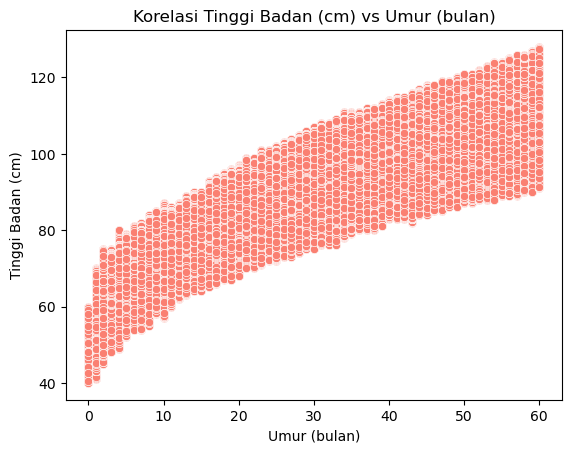

In [102]:
#TINGGI BADAN VS UMUR
sns.scatterplot(x = df['Umur (bulan)'], y = df['Tinggi Badan (cm)'], color = 'salmon')
plt.title('Korelasi Tinggi Badan (cm) vs Umur (bulan)')
plt.xlabel('Umur (bulan)')
plt.ylabel('Tinggi Badan (cm)')
plt.show()

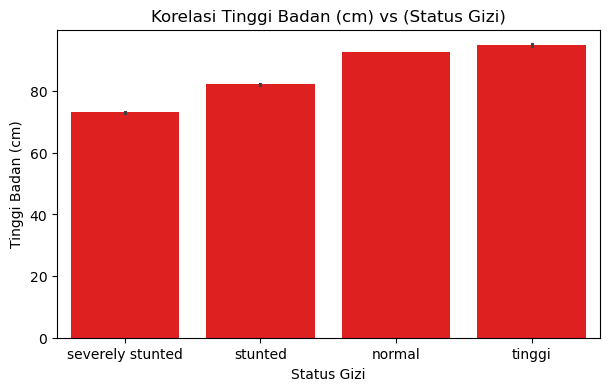

In [112]:
#TINGGI BADAN VS STATUS GIZI
status_mapping = {
    'severely stunted':1,
    'stunted' : 2,
    'normal' : 3,
    'tinggi' : 4
}
df['Status Gizi num'] = df['Status Gizi'].map(status_mapping)

plt.figure(figsize=(7,4))
sns.barplot(x='Status Gizi', y='Tinggi Badan (cm)', data=df, order=['severely stunted','stunted', 'normal', 'tinggi'], color = 'red')
plt.title('Korelasi Tinggi Badan (cm) vs (Status Gizi)')
plt.xlabel('Status Gizi')
plt.ylabel('Tinggi Badan (cm)')
plt.show()

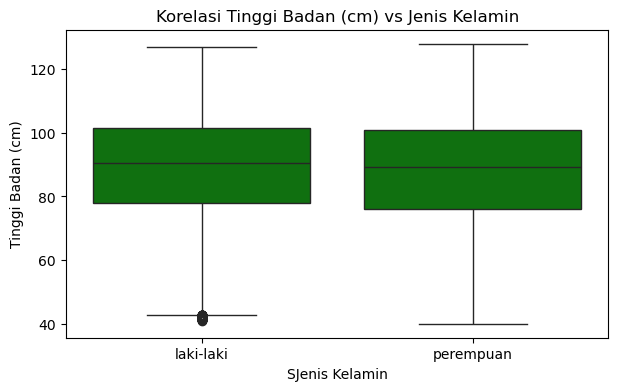

In [114]:
#TINGGI BADAN VS JENIS KELAMIN
plt.figure(figsize=(7,4))
sns.boxplot(x='Jenis Kelamin', y='Tinggi Badan (cm)', data=df, color = 'green')
plt.title('Korelasi Tinggi Badan (cm) vs Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Tinggi Badan (cm)')
plt.show()

**REGRESI LINEAR**

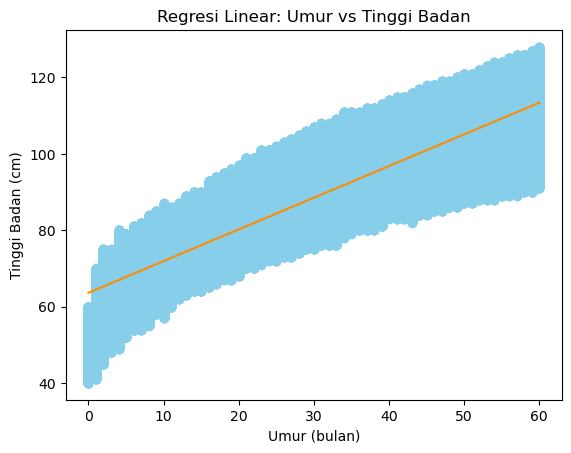

In [141]:
from sklearn.linear_model import LinearRegression

X = df[['Umur (bulan)']]  
y = df['Tinggi Badan (cm)'] 

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y, color='skyblue', label='Data asli')
plt.plot(X, model.predict(X), color='darkorange', label='Regresi Linear')
plt.title('Regresi Linear: Umur vs Tinggi Badan')
plt.xlabel('Umur (bulan)')
plt.ylabel('Tinggi Badan (cm)')
plt.show()